This is a PySR run on the molecular mass dataset with the division operator removed and the logarithm and exponential operators added. Iterations increased to 1000

In [1]:
# Install libraries
%pip install -U pysr

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive
from pysr import PySRRegressor
import time
#import math
import sympy as sym

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
# Colab
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')
# Positron
df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')

y=df['MW']
x=df[['SG','TBP']]

In [4]:
t0 = time.time()
# Add Log and Exp Functions
myMod=PySRRegressor(
    random_state=7,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*"],
    unary_operators=["exp","log"],
    niterations=1000)
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p312a/lib/python3.12/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 2.400e+05
Progress: 949 / 31000 total iterations (3.061%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.61
5           1.858e+04  2.281e-01  y = (TBP * 0.00093598) * TBP
6           1.658e+04  1.115e-01  y = TBP * (log(TBP) + -5.8922)
7           1.090e+04  4.186e-01  y = ((TBP * 0.0016541) + -0.54181) * TBP
9           6.138e+03  2.865e-01  y = (TBP * ((TBP * 0.0032561) + -2.6518)) + 631.67
11          4.551e+03  1.493e-01  y = ((TBP * TBP) * 1.7955e-06) * ((SG * -310.59) + TBP)
13          2.102e+03  3.859e-01  y = ((TBP * 2.235e-06) * ((TBP + (SG * -502.32)) * TBP)) +...
                                       98.301
15          2.043e+03  1.412e-02  y = (((TBP +

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.62
4           1.888e+04  4.402e-01  y = exp(TBP * 0.0073314)
5           1.858e+04  1.396e-02  y = (TBP * TBP) * 0.00093598
6           3.878e+03  1.566e+00  y = exp((TBP * 0.0044146) + 2.7695)
8           6.764e+02  8.730e-01  y = exp(((0.0046037 * TBP) + 3.5406) - SG)
10          6.574e+02  1.417e-02  y = exp(((0.0045827 * TBP) - SG) + 3.5434) - -5.3855
12          6.140e+02  3.417e-02  y = (TBP * exp(((TBP * 0.0040278) + -2.8286) - SG)) + 57.5...
                                      33
14          5.935e+02  1.694e-02  y = (TBP * exp((-2.8286 - (SG * 1.0217)) + (TBP * 0.004042...
                                      1))) + 59.575
16          5.692e+02  2.088e-02  y = ((TBP - exp(exp(SG))) * exp(-2.8286 + ((TBP * 0.004042...
                       

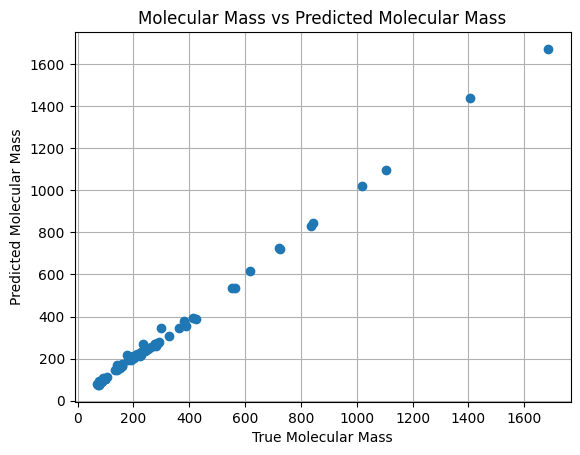

In [5]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [6]:
# Pull Out Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

(0.449491965290983*TBP - 62.7032301741615)*exp(3.4424363e-9*TBP**2*(-355.2896*SG + 0.7036*TBP))

In [7]:
# Add Prediction to Dataframe
df['Fit_Mw_7']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw_7
SG,1.000000,0.625218,0.334852,0.353473
TBP,0.625218,1.000000,0.869591,0.864733
MW,0.334852,0.869591,1.000000,0.998880
Fit_Mw_7,0.353473,0.864733,0.998880,1.000000


In [8]:
print(myMod)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          304.55478   
	1         0.592876                                   TBP + -270.62112   
	2         0.443273                            exp(TBP * 0.0073313797)   
	3         0.015941                          (TBP * TBP) * 0.000935977   
	4         1.566772                 exp((TBP * 0.00441459) + 2.769467)   
	5         0.873224       exp(((0.0046037138 * TBP) + 3.5405977) - SG)   
	6         0.014197  exp(((0.004582665 * TBP) - SG) + 3.543425) - -...   
	7         0.034199  (TBP * exp(((TBP * 0.004027789) + -2.8285704) ...   
	8         0.016968  (TBP * exp((-2.8285704 - (SG * 1.0217484)) + (...   
	9         0.020914  ((TBP - exp(exp(SG))) * exp(-2.8285704 + ((TBP...   
	10        0.004965  (exp((-2.8285704 - SG) + ((TBP - exp(SG * 2.19...   
	11        0.070602  ((TBP - exp(exp(SG - -0.20910837))) * exp(((TB...   
	12      

In [9]:
t0 = time.time()
# Re-Run with new random seed
myMod=PySRRegressor(
    random_state=11,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*"],
    unary_operators=["exp","log"],
    niterations=1000)
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p312a/lib/python3.12/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.600e+05
Progress: 1135 / 31000 total iterations (3.661%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP - 270.62
5           2.347e+04  1.116e-01  y = (TBP * 1.3999) - 500.62
6           1.658e+04  3.446e-01  y = TBP * (log(TBP) + -5.8922)
7           7.214e+03  8.313e-01  y = ((1.1829e-06 * TBP) * TBP) * TBP
9           6.138e+03  8.050e-02  y = (TBP * ((TBP * 0.0032561) + -2.6519)) - -631.68
11          4.928e+03  1.095e-01  y = ((TBP + -502.26) * ((TBP * TBP) * 2.2773e-06)) + 138.0...
                                      3
13          2.105e+03  4.250e-01  y = (((TBP * 2.2244e-06) * TBP) * (TBP + (SG * -497.23))) ...
                                      + 94.722
15 

[ Info: Final population:
[ Info: Results saved to:


time to fit:  141.5546374320984 seconds
  - outputs/20250722_165303_9waaXW/hall_of_fame.csv


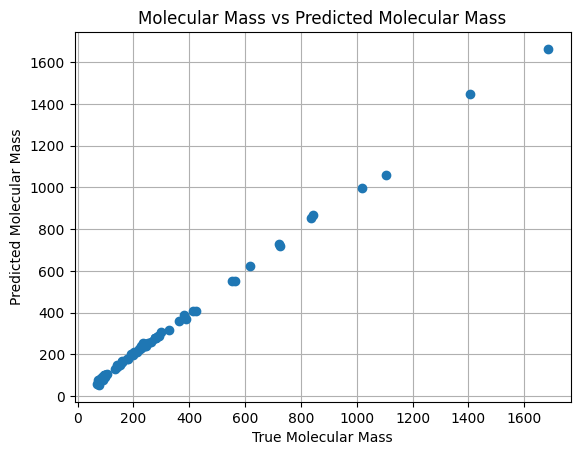

In [10]:
# Replot with new predictions
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [11]:
# Pull Out New Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

-208.49345*SG + exp(-SG**2 + log(TBP)**2)/TBP**5.7967854 + 0.6740138*TBP**1.0

In [12]:
# Add New Prediction to Dataframe
df['Fit_Mw_11']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw_7,Fit_Mw_11
SG,1.000000,0.625218,0.334852,0.353473,0.331159
TBP,0.625218,1.000000,0.869591,0.864733,0.870264
MW,0.334852,0.869591,1.000000,0.998880,0.999324
Fit_Mw_7,0.353473,0.864733,0.998880,1.000000,0.998851
Fit_Mw_11,0.331159,0.870264,0.999324,0.998851,1.000000
